<a href="https://colab.research.google.com/github/biemt-pesc-coppe-ufrj/GabrielLeticiaRennan/blob/master/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import certifi
# import elasticsearch
import json
# import lime
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import random
import re
import requests
import statistics
import sklearn.ensemble
# from elasticsearch.helpers import scan
from io import BytesIO
from PIL import Image
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Trabalho Final 

O objetivo deste trabalho é comparar resultados de 4 classificadores utilizando dois datasets com discurso de ódio. Para realizar a classificação, os dois datasets foram reunidos em um só e cada classificador foi executado 10 vezes, dando resultados de acurácia, precisão e F1.

In [ ]:
class DatasetFile:

  def __init__(self):
    self.keywords = ["arrombado", "asno", "acefalo", "babaca", "babuino", "baitola", "biba", "bixa", "bixinha", "bobo", "boquete", "borra", "bosta", "buceta", "burro", "cacete", "cadela", "cagar", "cala", "caralho", "chupe", "come", "corno", "cu", "cusao", "desgracado", "egua", "enraba", "fdp", "fiderapariga", "fidumaegua", "filhodaputa", "filhodeumaputa", "foda", "fodase", "foder", "fudido", "gay", "grelo", "idiota", "inferno", "jegue", "louco", "macaco", "mamar", "marica", "merda", "mijao", "otario", "pariu", "pau", "peidar", "pica", "pinto", "piriguete", "piroca", "piru", "porra", "puta", "quinto", "rapariga", "retardado", "rola", "siririca", "tesuda", "tomar", "vagabundo", "vaite", "veado", "velha", "viado", "xereca"]

  def clean_text(self, text):
      REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|,;]')

      text = text.lower() # lowercase text
      text = REPLACE_BY_SPACE_RE.sub(' ', text) 
      return text

  def load_datasets(self, list_file_name):
    files_content = []
    for file_name in list_file_name:
      files_content.append(pd.read_csv(file_name))
    return pd.concat(frames)

  def load_dataset(self, file_path):
      """
      Load dataset from arff file

      Parameters
      ----------
      file_path: string
          path from arff file

      Returns
      -------
      file_dataframe: pandas.DataFrame
          return loaded data on a
          DataFrame
      """
      classification = []
      text = []
      bad_word_feature = []
      with open(file_path,'r') as file:
          for line in file:
              class_i = line[:3]
              text_i = line[4:-2]
              if class_i == 'no,':
                  class_i = 0
                  text_cleaned = self.clean_text(text_i)
                  classification.append(class_i)
              if class_i == 'yes':
                  class_i = 1
                  text_cleaned = self.clean_text(text_i[1:])
                  classification.append(class_i)
              
              if class_i == 1 or class_i == 0:
                  text.append(text_cleaned)
                  has_word = 0
                  for word in self.keywords:
                      if word in text_cleaned:
                          has_word = 1
                  bad_word_feature.append(has_word)
      dataset_dict = {'classification': classification , 'text':text}
      file_dataframe = pd.DataFrame(dataset_dict)
      return file_dataframe

Definindo como os modelos devem dividir o dataset e calculando a acurácia, f1 e precisão dos resultados.

A acurácia é a porcentagem de predições feitas corretamente, dado o número total de predicões:

$Acc = \frac{VP + VN}{VP + VN + FP + FN}$

sendo VP = verdadeiro positivo, 
      FP = falso positivo,
      VN = verdadeiro negativo e
      FN = falso negativo.

A precisão informa o quanto o classificador consegue não classificar como postivas, labels que são negativas.

$Prec = \frac{VP}{VP+FP}$

E a métrica F1 é uma média ponderada da precisão e do recall.

$F1 = \frac{2*(Prec*Rec)}{Prec+Rec}$

sendo $Rec = \frac{VP}{VP+FN}$

In [ ]:
class Models:

  def __init__(self):
    pass

  def evaluate_model(self, model, X, y, model_name):
    """
    Routine to evaluate model performance without k-fold
    """
    test_acc_list = []
    test_f1_list = []
    test_prec_list = []
    for i in range(0, 10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                          test_size=0.30)
      
      model.fit(X_train, y_train)
      
      test_results = model.predict(X_test)

      test_acc = metrics.accuracy_score(y_test, test_results)
      test_f1 = metrics.f1_score(y_test, test_results, pos_label=1)
      test_prec = metrics.precision_score(y_test, test_results, pos_label=1)
      test_acc_list.append(test_acc)
      test_f1_list.append(test_f1)
      test_prec_list.append(test_prec)
     
    test_mean_acc = statistics.mean(test_acc_list)
    test_mean_f1 = statistics.mean(test_f1_list)
    test_mean_prec = statistics.mean(test_prec_list)

    test_std_acc = statistics.stdev(test_acc_list)
    test_std_f1 = statistics.stdev(test_f1_list)
    test_std_prec = statistics.stdev(test_prec_list)
    
    print(f"{model_name} Results: \n")
    print(f"Test accuracy score of Hate speech {test_mean_acc} +/- {test_std_acc}\n")
    print(f"Test f1 score of Hate speech {test_mean_f1} +/- {test_std_f1}\n")
    print(f"Test precision score of Hate speech {test_mean_prec} +/- {test_std_prec}\n")

    return test_acc_list, test_f1_list, test_prec_list


# Abrindo o dataset

In [ ]:
df = DatasetFile()

dataset = df.load_datasets(['cleaned_balanced_paula.csv', 'cleaned_balanced_rogers.csv'])
size_ofensive_examples = dataset[dataset['classification']==1].count()[0]
size_normal_examples = dataset[dataset['classification']==0].count()[0]
print(f"We have {size_ofensive_examples} ofensive examples and {size_normal_examples} normal examples")


We have 2207 ofensive examples and 2207 normal examples


In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
text = dataset['text']
classification = dataset['classification']

# Creating Bag of words
vectorizer = TfidfVectorizer(stop_words=stopwords, lowercase=True, analyzer='word', token_pattern=r'[A-Za-z]{3,}')
bag_of_words = vectorizer.fit_transform(text)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amos', 'est', 'estiv', 'houv', 'nhamos', 'ramos', 'ser', 'ssemos', 'tamb', 'ter', 'tiv', 'vamos', 'voc'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Treinando e testando os modelos

In [ ]:
model = Models()

best_number_of_trees=10
# Random forest using the best number of trees
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=best_number_of_trees)
# rf.fit(bag_of_words, classification)

# Evaluate model metrics
rfc_acc_list, rfc_f1_list, rfc_prec_list = model.evaluate_model(rf, bag_of_words, classification, 'Random Forest')

Random Forest Results: 

Test accuracy score of Hate speech 0.6537358490566038 +/- 0.006160183924714737

Test f1 score of Hate speech 0.5950418516076282 +/- 0.02391271431500575

Test precision score of Hate speech 0.7078056410697638 +/- 0.04472388556335876



In [ ]:
# Using multinomial naive bayes
mnb = MultinomialNB()

# Evaluate model metrics
mnb_acc_list, mnb_f1_list, mnb_prec_list = model.evaluate_model(mnb, bag_of_words, classification, 'Naive Bayes')

Naive Bayes Results: 

Test accuracy score of Hate speech 0.6839245283018868 +/- 0.010340816163956823

Test f1 score of Hate speech 0.6978641649056389 +/- 0.009619309500776206

Test precision score of Hate speech 0.6759581961144369 +/- 0.01850262549233322



In [ ]:
svm = SGDClassifier()

# Evaluate model metrics
svm_acc_list, svm_f1_list, svm_prec_list = model.evaluate_model(svm, bag_of_words, classification, 'Support Vector Machine')

Support Vector Machine Results: 

Test accuracy score of Hate speech 0.6610566037735849 +/- 0.01607092385546931

Test f1 score of Hate speech 0.6561337740230891 +/- 0.01715020424591968

Test precision score of Hate speech 0.6640486573017889 +/- 0.01609223876486641



In [ ]:
xgb = XGBClassifier()

# Evaluate model metrics
xgb_acc_list, xgb_f1_list, xgb_prec_list = model.evaluate_model(xgb, bag_of_words, classification, 'Xtreme Gradient Boosting')

Xtreme Gradient Boosting Results: 

Test accuracy score of Hate speech 0.6354716981132076 +/- 0.01254334677969099

Test f1 score of Hate speech 0.5334727162433334 +/- 0.0244260885424244

Test precision score of Hate speech 0.7506117648422923 +/- 0.03270423536423263



# Analisando os resultados

Text(0.5, 1.0, 'Precision')

<Figure size 864x576 with 0 Axes>

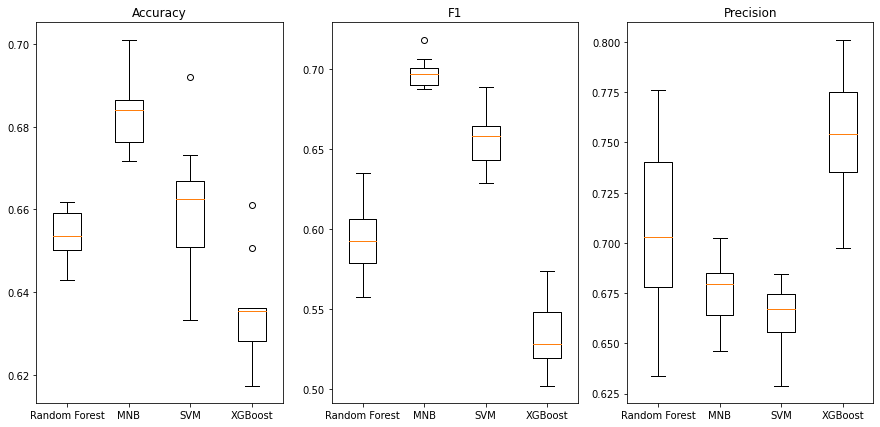

In [ ]:
import matplotlib.pyplot as plt
data_acc = [rfc_acc_list, mnb_acc_list, svm_acc_list, xgb_acc_list] 
data_f1 = [rfc_f1_list, mnb_f1_list, svm_f1_list, xgb_f1_list] 
data_prec = [rfc_prec_list, mnb_prec_list, svm_prec_list, xgb_prec_list]
labels = ['Random Forest', 'MNB', 'SVM', 'XGBoost']
plt.figure(figsize=(12,8))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

bplot1 = axes[0].boxplot(data_acc, labels=labels)
axes[0].set_title('Accuracy')

bplot2 = axes[1].boxplot(data_f1, labels=labels) 
axes[1].set_title('F1')

bplot3 = axes[2].boxplot(data_prec, labels=labels) 
axes[2].set_title('Precision')

